<a href="https://colab.research.google.com/github/rgolds5/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
!pip install --upgrade seaborn

In [0]:
import seaborn as sns
sns.__version__

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

In [0]:
income.head()

In [0]:
lifespan.head()

In [0]:
population.head()

In [0]:
pd.options.display.max_columns = 500
entities.head()

In [0]:
concepts.head()

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

## Explore data

## Plot visualization

## Analyze outliers

## Plot multiple years

## Point out a story

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

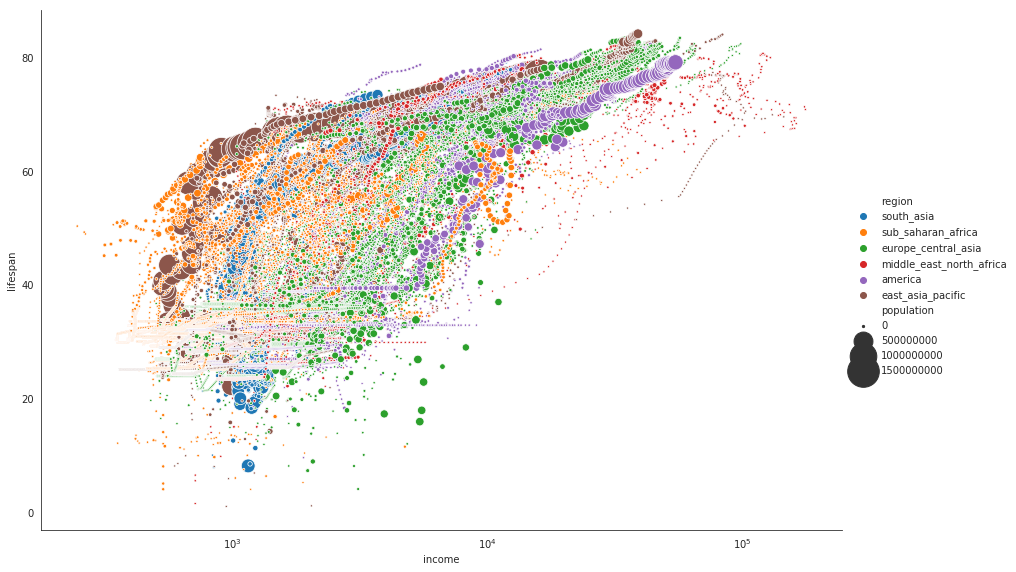

In [2]:
# Importing in necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import moviepy.editor as mpy
import os

sns.set_style('white')

# Reading in datasets

# Create a dictionary with the key being the name you want for the dataframe
# and value being the url of the csv file that needs to be read
csv_dict = {
    'income': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv',
    'lifespan': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv',
    'population': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv',
    'entities': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv',
    'concepts': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv',
}
# Create an empty dictionary that will contain the dataframe to be read
dfs = {}

# for loop will cycle through the items in the csv_dict reading in each 
# one and placing them into the dfs dictionary
for k in csv_dict:
    dfs[k] = pd.read_csv(csv_dict[k])

# Income, lifespan, and population all have geo and time columns
# Merging them together with the default inner merge will combine the datasets
# while removing uncommon rows

# Entities contains country (which matches to geo in the previous dataframes),
# name, and region(world_6region) columns. We can merge only these columns with the 
# income, lifespan, and population dataframe. Since geo and country contain the same 
# data but with different names, we will need to specify how to merge. 

# We then drop columns that were merged that we no longer need or are duplicated

# Columns can be renamed as well so that the dataframe is more readable. 

# All of the above has been combined into one method chain resulting in a single
# dataframe that contains only the information that we need.

df = (dfs['income']
    .merge(dfs['lifespan'])
    .merge(dfs['population'])
    .merge(dfs['entities'][['country', 'name', 'world_6region']], 
        left_on = 'geo', right_on = 'country')
    .drop(columns = ['geo', 'country'])
    .rename(columns = {'time': 'year', 
                'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
                'life_expectancy_years': 'lifespan',
                'name': 'country',
                'population_total': 'population',
                'world_6region': 'region'}))

sns.relplot(x = 'income',
            y = 'lifespan',
            hue = 'region',
            size = 'population',
            data = df,
            sizes = (5,1000),
            height = 8,
            aspect = 1.5)
plt.xscale('log')
plt.show();



In [0]:
###Do not run this in jupyter..it will likely crash. Implemented in Visual Studio Code

#for year in df['year'].unique():
#   tmp = df[df['year'] == year]
#  sns.relplot(x = 'income',
#            y = 'lifespan',
#            hue = 'region',
#            size = 'population',
#            data = tmp,
#            sizes = (5,1000),
#            height = 5,
#            aspect = 1.5)
#  plt.xscale('log')
#  plt.xlabel('Income Per Person')
#  plt.ylabel('Average Lifespan')
#  plt.title(f'Year: {str(year)}')
#  plt.xlim(10, 1300000)
#  plt.ylim(0, 100)
#  filename = f'Gapminderstep_{year}.png'
#  plt.savefig(filename, dpi = 96)
#  plt.gca()


###Getting 'list index out of range error' when attempting with MoviePy
###gif_name = 'animated_gapminder'
###fps = 12
###file_list = glob.glob('.png')
###list.sort(file_list, key = lambda x: int(x.split('_')[1].split('.png')[0]))
###clip = mpy.ImageSequenceClip(file_list, fps = fps)
###clip.write.gif(f'animated_gapminder.gif', fps = fps)

#ImageMagick Implementation

#gif_name = 'animated_gapminder'
#file_list = glob.glob('*.png')
#list.sort(file_list, key = lambda x: int(x.split('_')[1].split('.png')[0]))

#with open('image_list.txt', 'w') as file:
#  for item in file_list:
#    file.write('%s\n' % item)

#os.system(f'magick -delay 1x10 @image_list.txt {gif_name}.gif')
  

In [5]:
## This is the animated chart that is the result of the code above

from IPython.display import display, Image
url = 'https://i.imgur.com/xNk3jSK.gif'
example = Image(url=url, width=600)

display(example)

In [0]:
### This is a work in progress....Do not run right now as it will crash


#from bokeh.core.properties import field
#from bokeh.io import curdoc, show
#from bokeh.layouts import layout
#from bokeh.models import (ColumnDataSource, HoverTool, SingleIntervalTicker,
#                         Slider, Button, Label, CategoricalColorMapper)
#from bokeh.palettes import Spectral6
#from bokeh.plotting import figure
#from bokeh.io import output_notebook

#output_notebook()

#plot = figure(x_range = (0, 1300000), y_range = (0, 100), 
#             title = 'Income vs Lifespan', plot_height = 300)
#plot.xaxis.ticker = SingleIntervalTicker(interval = 100000)
#plot.xaxis.axis_label = 'Income'
#plot.yaxis.ticker = SingleIntervalTicker(interval = 10)
#plot.yaxis.axis_label = 'Lifespan'

#label = Label(x = 100, y = 8, text = str(df['year'][0]),
#             text_font_size = '70pt')

#color_mapper = CategoricalColorMapper(palette = Spectral6, 
#                                      factors = df['region'].unique())

#plot.circle(x = 'income', y = 'lifespan', size = 'population', 
#           fill_color = {'field': 'region', 'transform': color_mapper},
#           source = df, fill_alpha = 0.8, line_color = '#7c7e71', 
#           line_width = 0.5, line_alpha = 0.8, legend = field('region'),)
#plot.add_tools(HoverTool(tooltips = 'country', show_arrow = False,
#                        point_policy = 'follow_mouse'))

#def animate_update():
#  year = slider.value + 1
#  if year > df['year'][-1]:
#    year = df['year'][0]
#  slider.value = year
  
#def slider_update(attrname, old, new):
#  year = slider.value
#  label.text = str(year)
#  df.data = data[year]
  
#slider = Slider(start = df['year'][0], end = 2018, 
#               value = df['year'][0], step = 1, title = 'Year')

#slider.on_change('value', slider_update)

#layout = layout([
#    [plot],
#    [slider],
#], sizing_mode = 'scale_width')

#curdoc().add_root(layout)
#curdoc().title = 'Gapminder'

#show(layout)


###Cannot use on_change callback in notebook...must implement Javascript callbacks

###Need to add play/pause button and debug plot.circle so that color does not 
###consume entire screen